<a href="https://colab.research.google.com/github/chrisszelaya/CS-4774-Machine-Learning/blob/main/qft2jk_CS_4774_Codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context


**In this project I will try to predict the housing prices of Ames using a regression task. I am expecting a RMSE of less than 30,000 and will be using this value to determine whether or not my model is a good one. The data I will be using comes from kaggle and it's of the prices of houses in the Ames area. I will be using a Linear Regression based algorithm. This will require a lot of effort especially being the first time I will be doing an ML model of my own**

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

Our data does contain categorical information. We also have missing values as well as many entries and featrues. These numbers are listed later in this section

In [ ]:

import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv("train.csv")
  return housing

housing = loadBostonHousingData()
housing.head(10)

# As seen below code contains missing values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Our data does contain some missing values either empty or some rows have data and others do not 

 Here is a quick summary of our data including name features , count , and type
 Entries = 1460 , Features= 81 

In [ ]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Number of entries = 1460 
Number of features = 81

In [ ]:
# Size of our file
print(str(os.path.getsize('train.csv')/1024**2) + " MB")

0.4393348693847656 MB


Size of the file is roughly .4393 MB

In [ ]:
# Basic Stats of our data

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

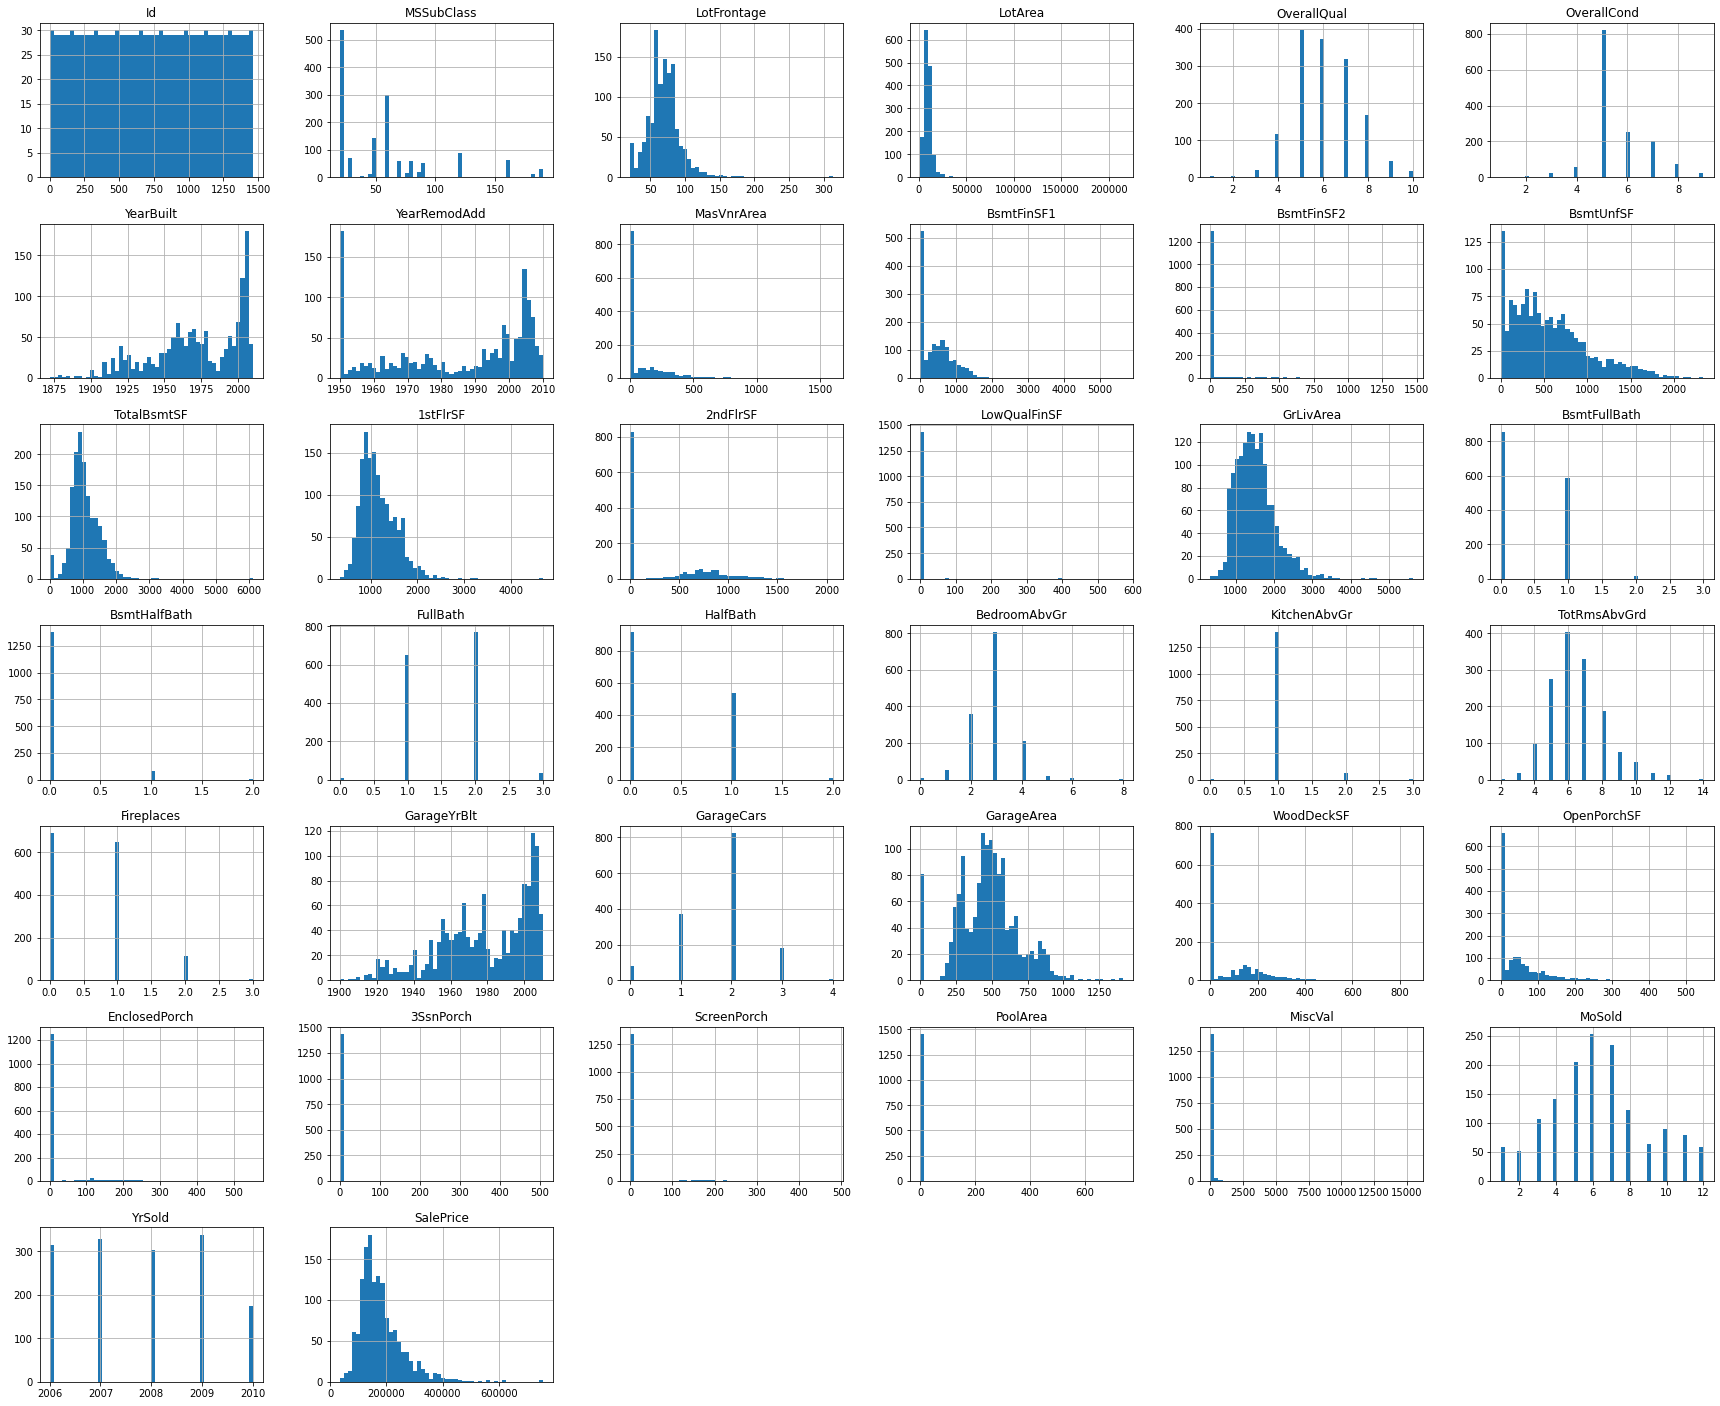

In [ ]:
# Your code to visualize the data here

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
housing.hist(bins=50, figsize=(30,25))
plt.show()
#save_fig("attribute_histogram_plots")


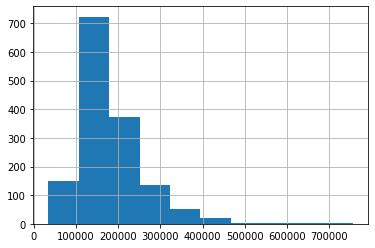

In [ ]:
housing["SalePrice"].hist()

In [ ]:
housing["income_cat"] = pd.cut(housing["GrLivArea"],
                               bins=[5., 6, 7.0, 9, 11., np.inf],
                               labels=[1,2,3,4,5])
housing["income_cat"].value_counts()

5    1460
1       0
2       0
3       0
4       0
Name: income_cat, dtype: int64

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

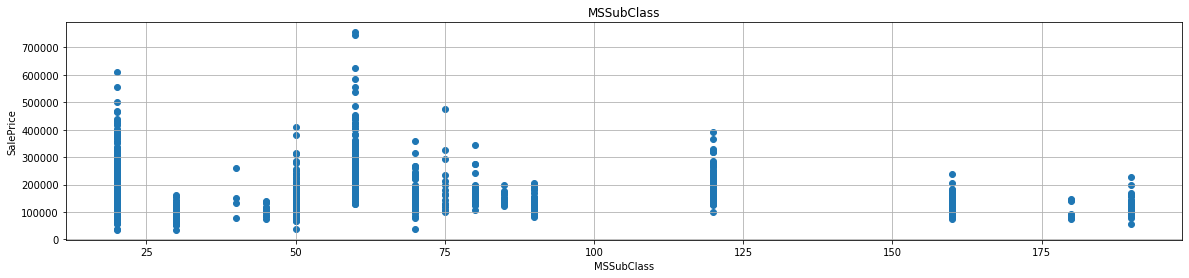

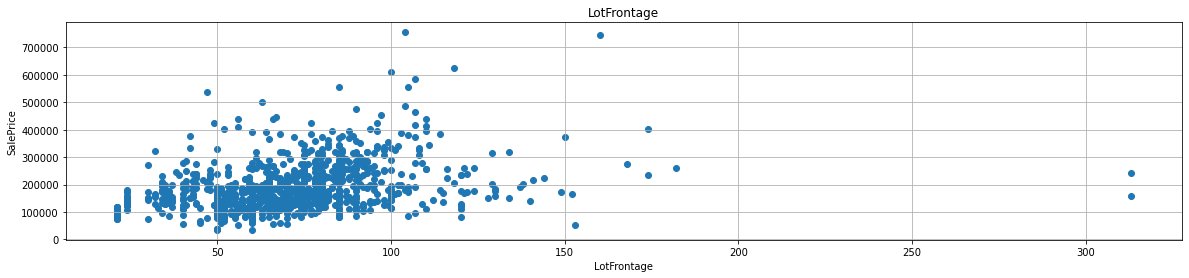

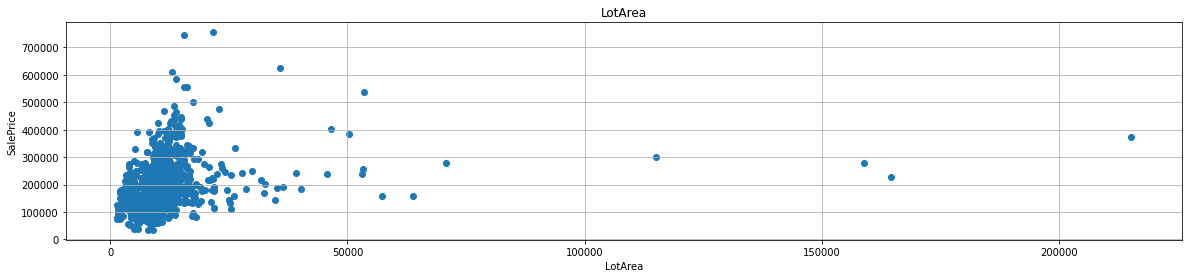

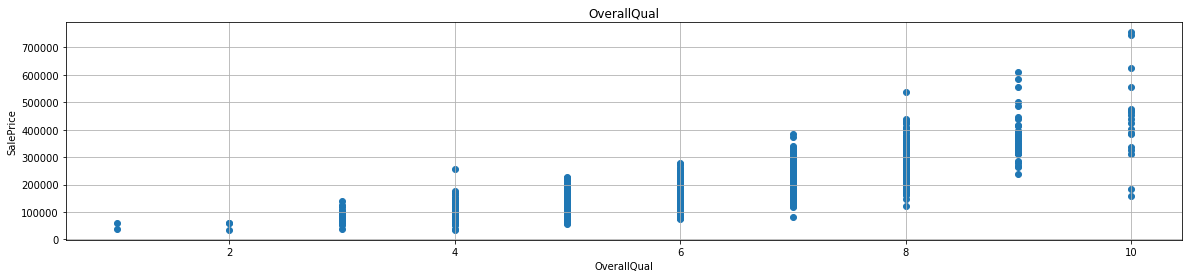

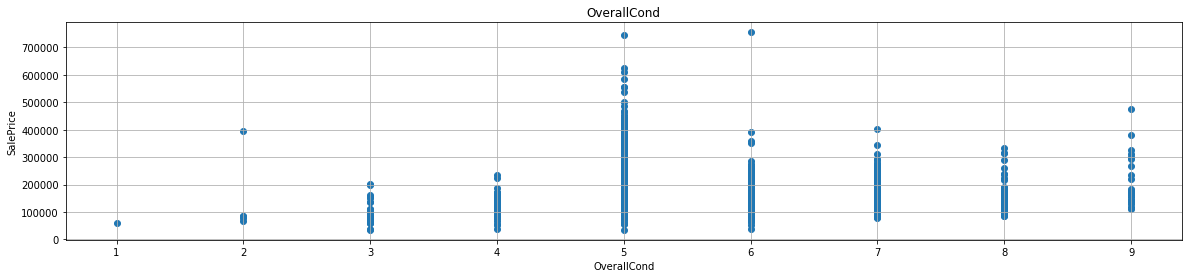

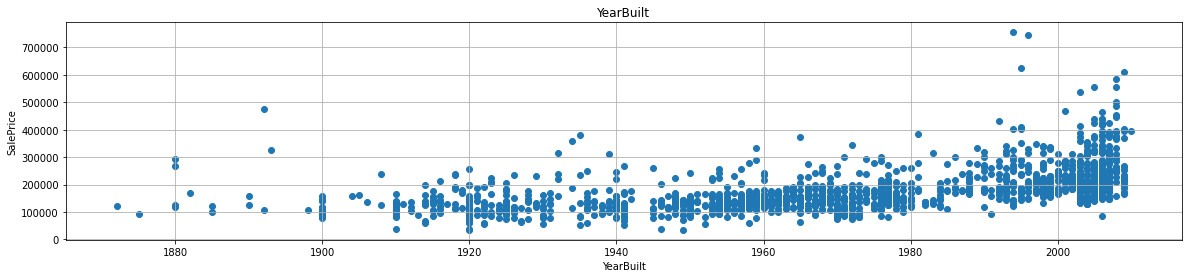

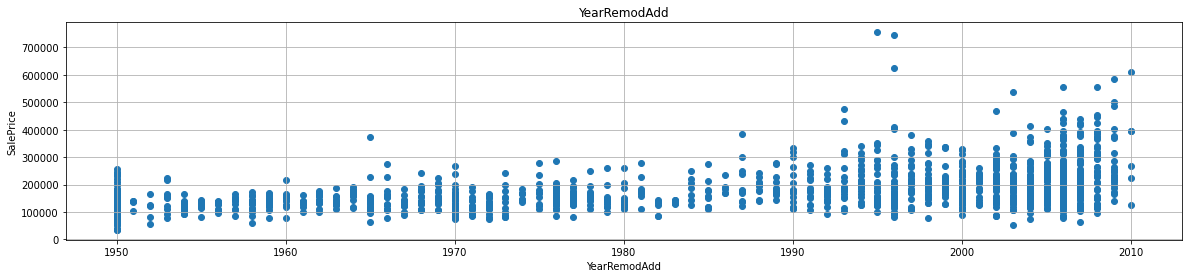

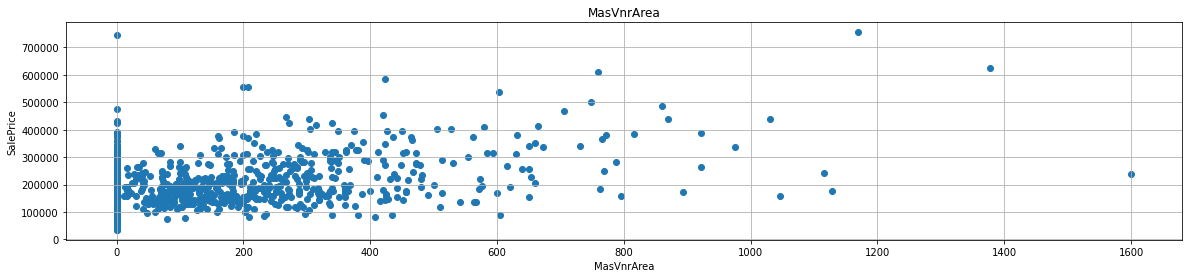

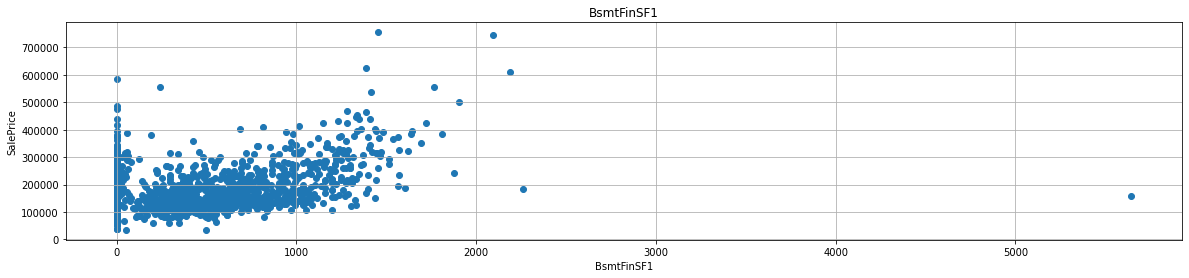

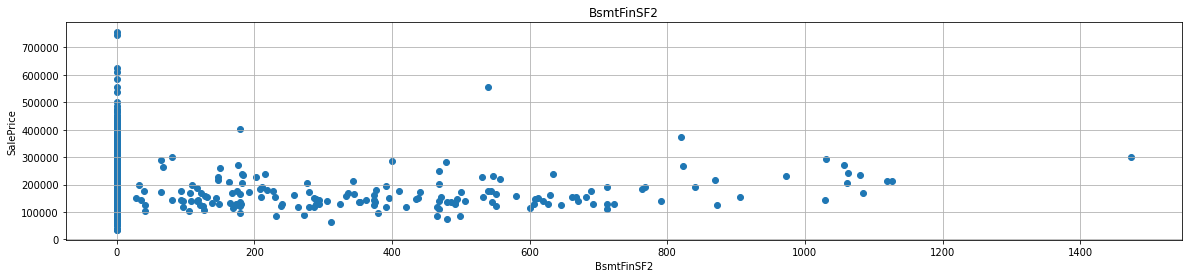

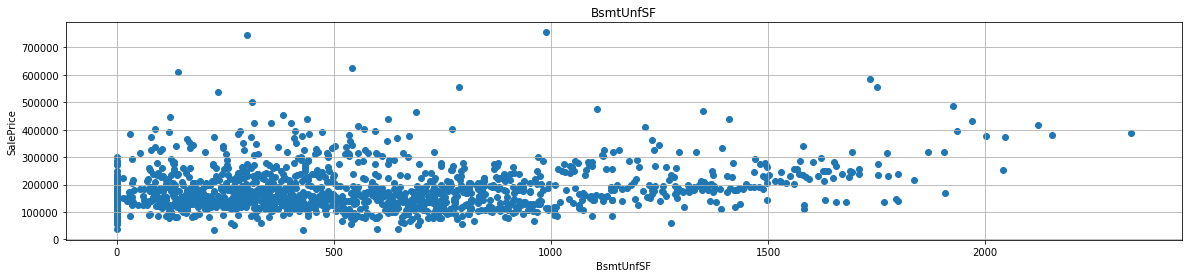

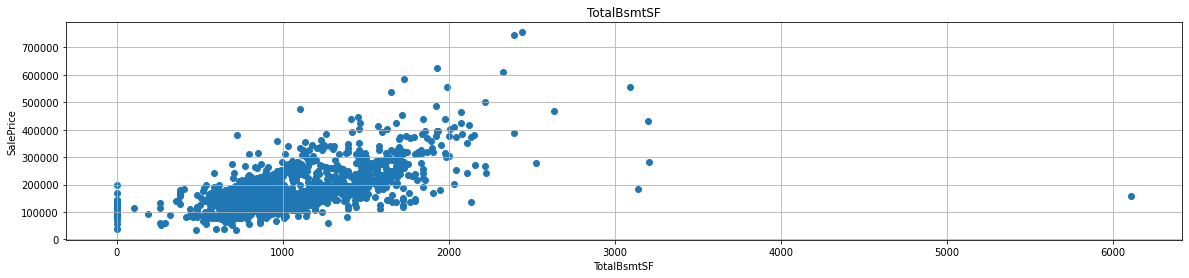

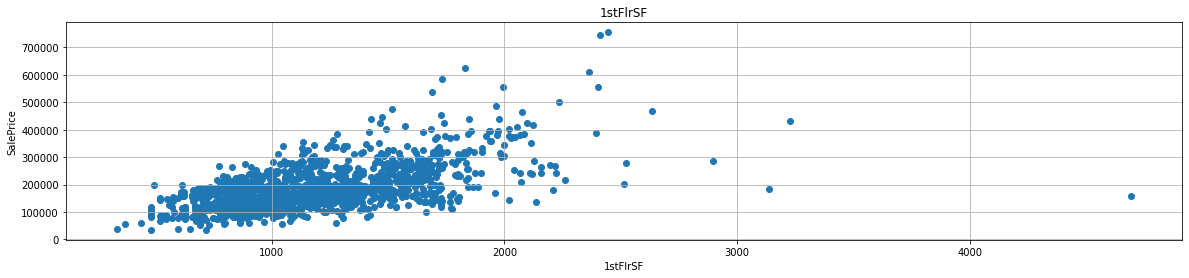

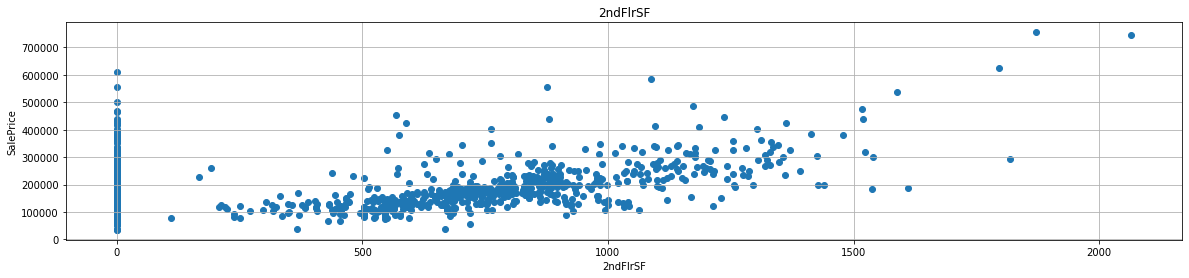

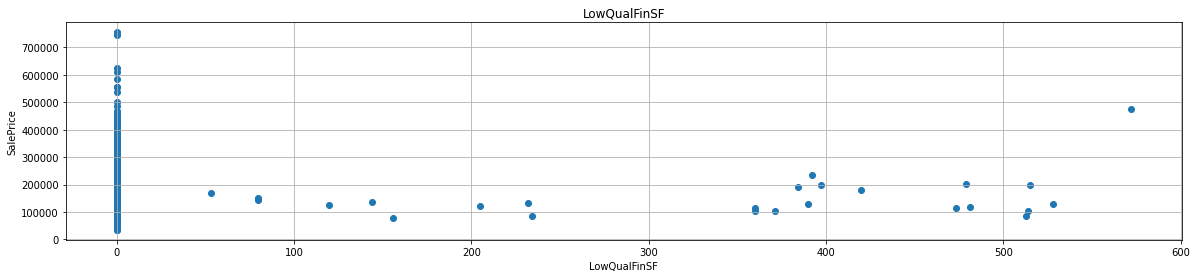

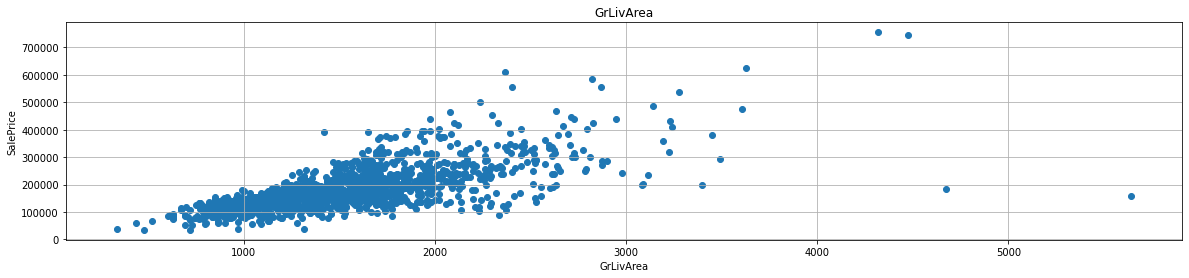

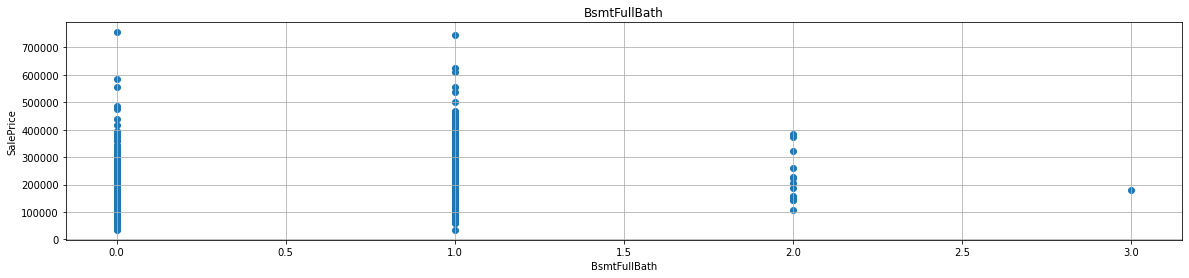

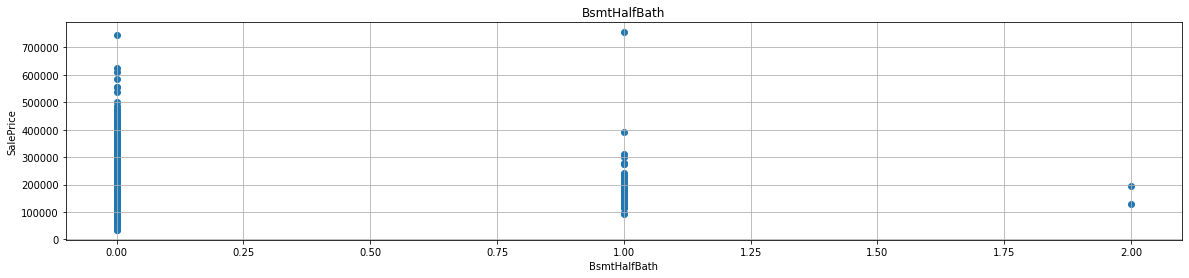

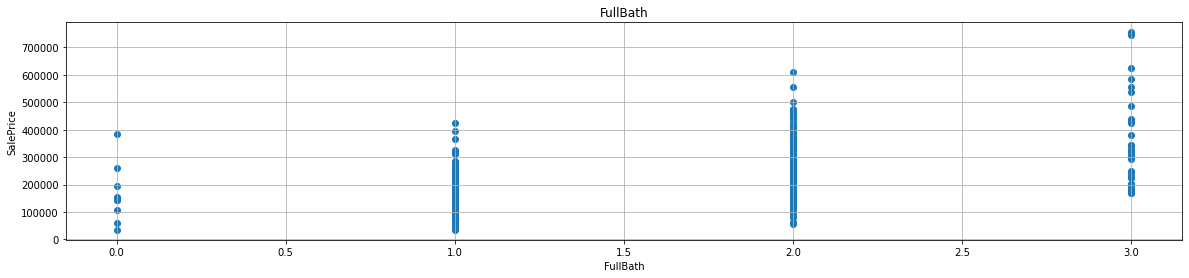

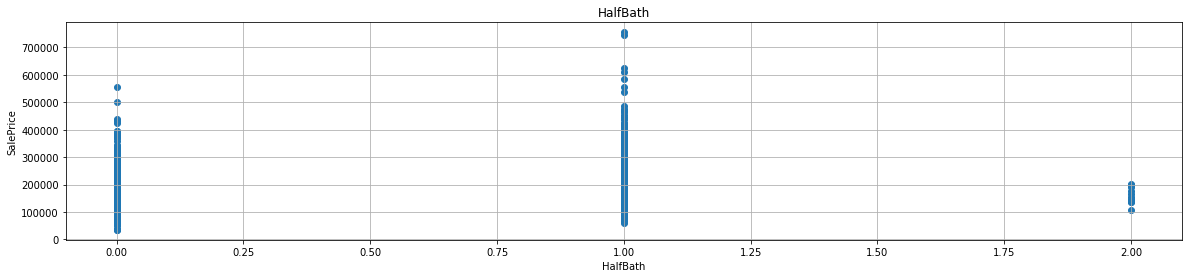

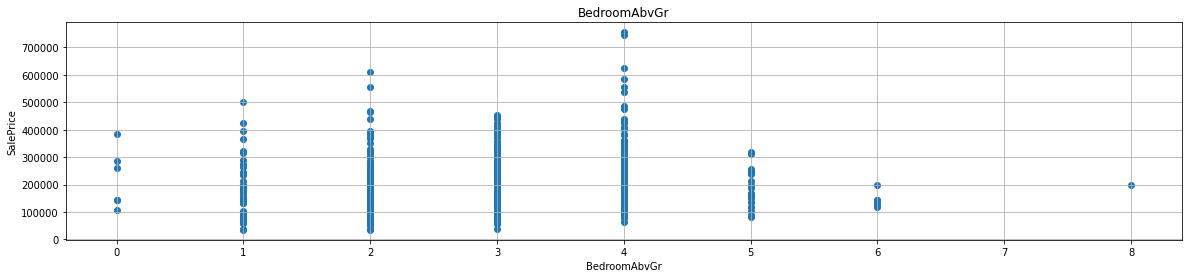

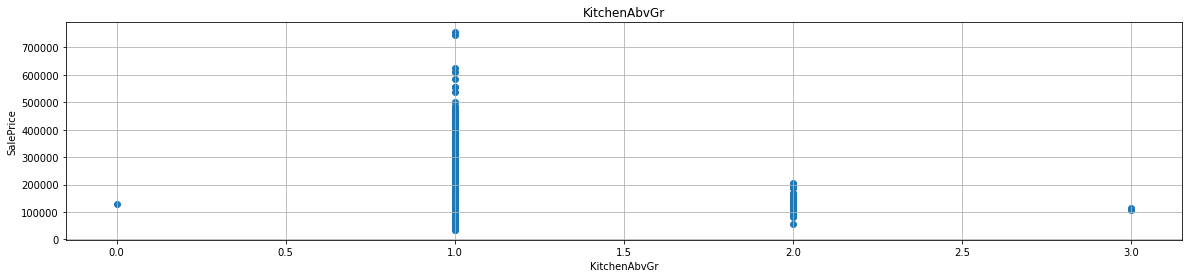

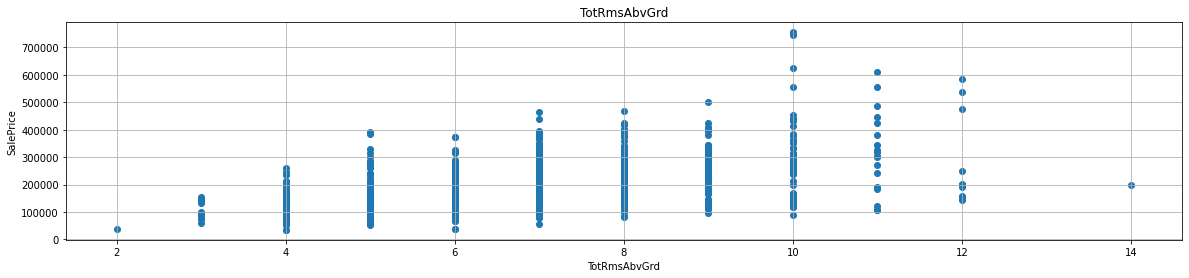

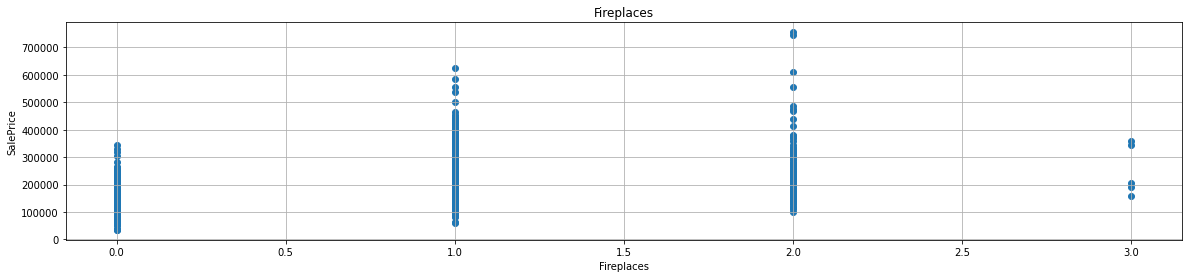

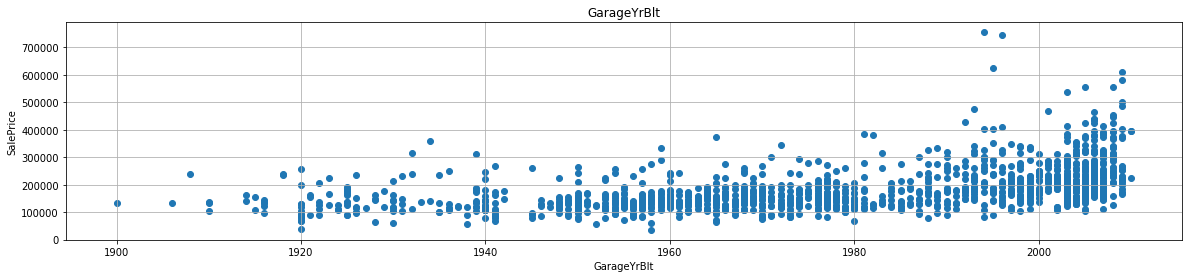

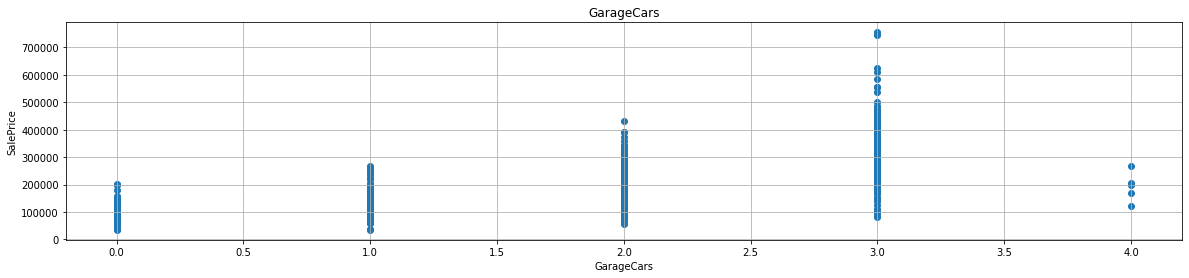

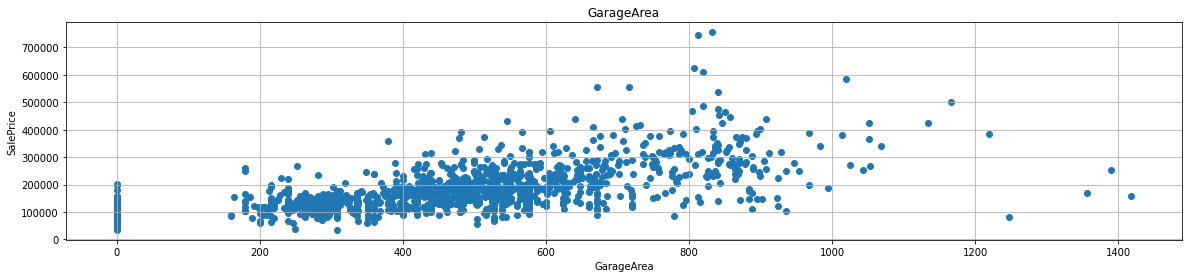

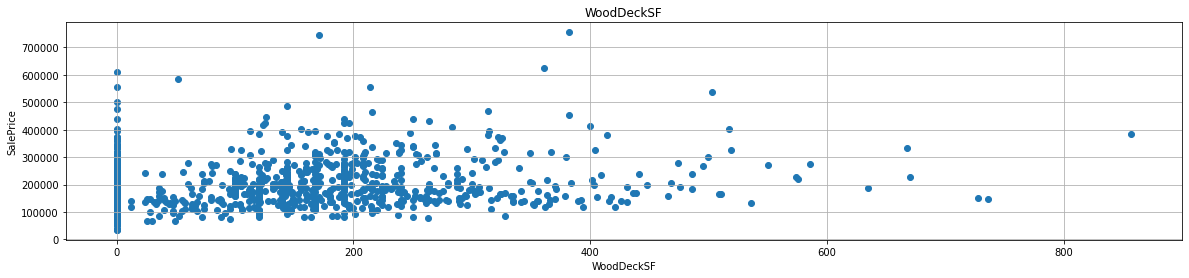

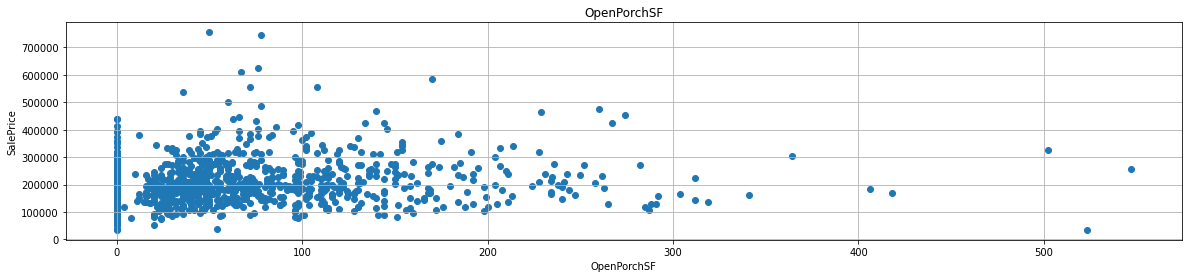

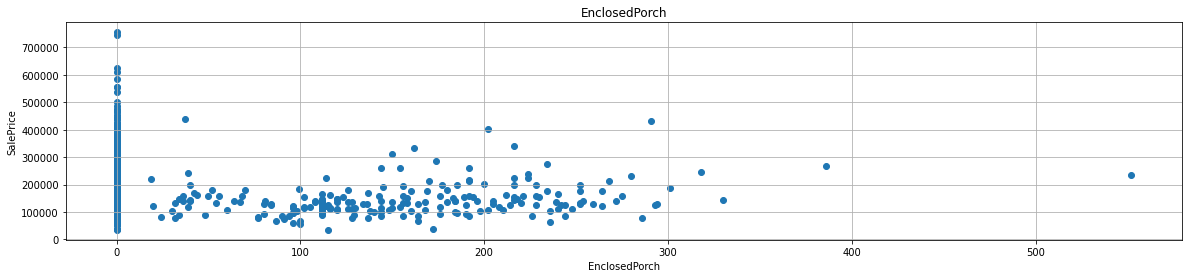

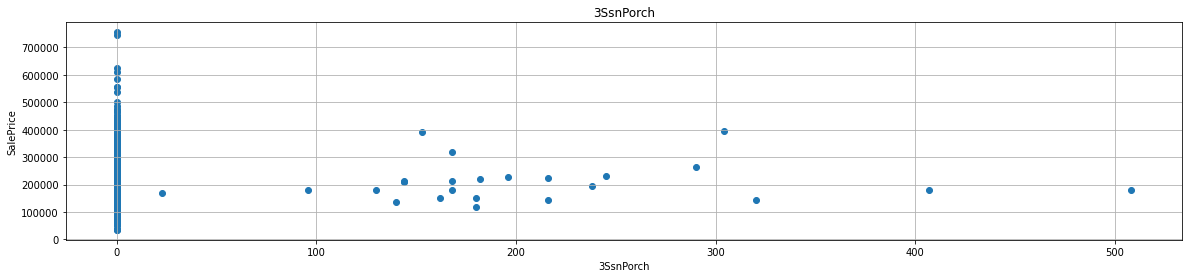

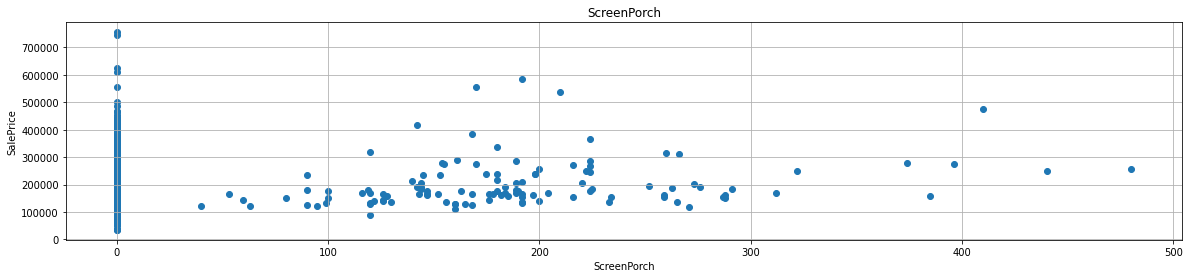

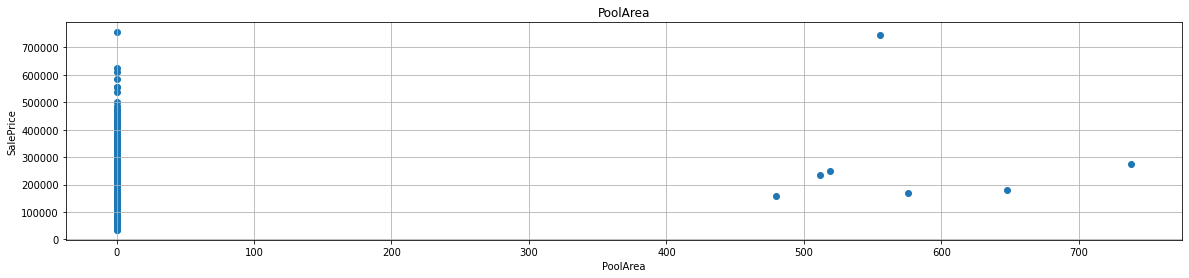

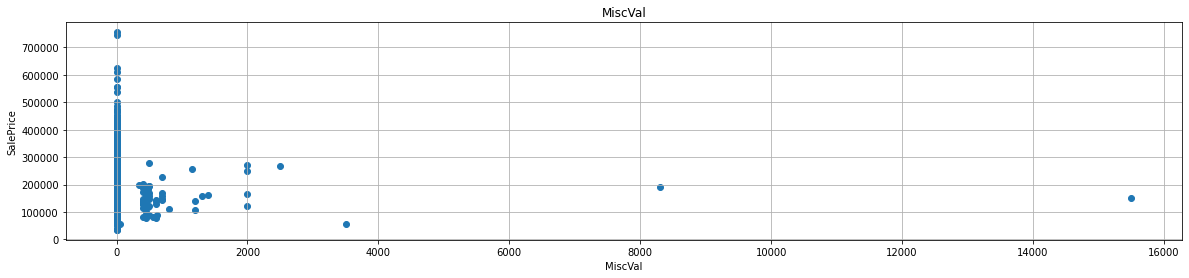

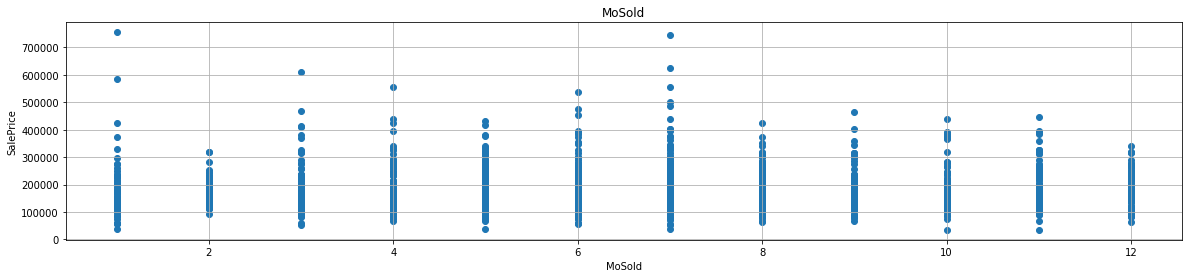

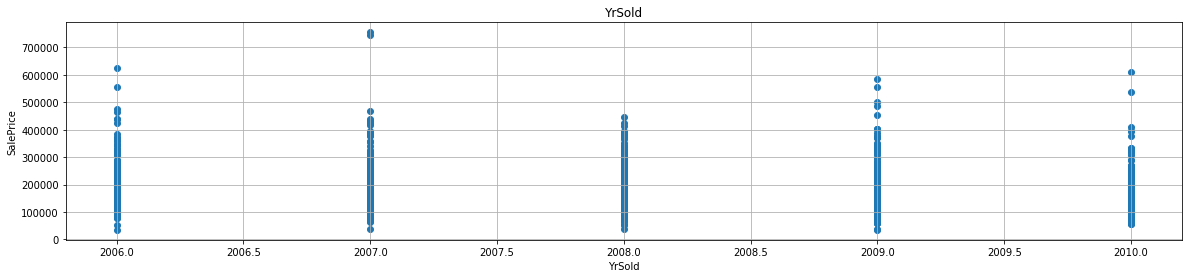

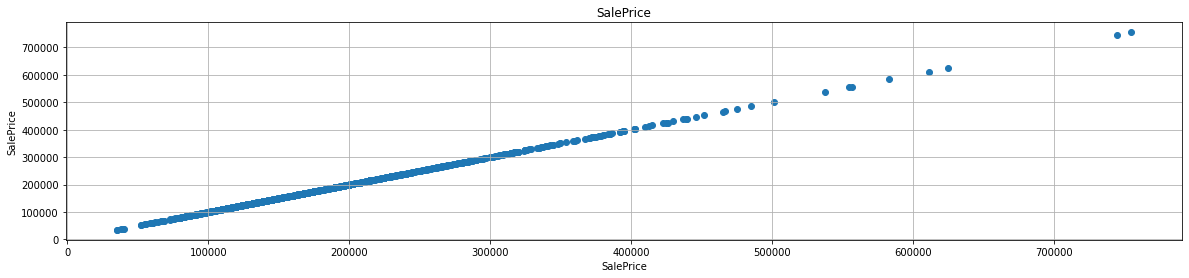

In [ ]:
for i in list(corr_matrix.columns)[1:]:
    y_station = i
    x = housing[y_station]
    y = housing["SalePrice"]
    plt.figure(figsize=(20,4))
    plt.scatter(x,y, marker='o')
    plt.grid()
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title(y_station)
    plt.subplots_adjust(hspace = 0.5)
    plt.show()


##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=42)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)


(934, 82)
(234, 82)
(292, 82)


In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,income_cat
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,5
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5


In [ ]:
sample_incomplete_rows.drop(["Alley", "MiscFeature","Fence","PoolQC","MiscVal"],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,income_cat
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,5
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,5
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,2,2006,WD,Abnorml,140000,5
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,5


In [ ]:
housing = train_set.drop("SalePrice", axis=1) # drop labels for training set
housing_labels = train_set["SalePrice"].copy()

In [ ]:
housing_num= housing.drop(["MiscVal","MiscFeature","PoolQC","Fence","Alley"], axis=1)
housing_num

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,income_cat
251,252,120,RM,44.0,4750,Pave,IR1,HLS,AllPub,Inside,...,0,0,0,153,0,12,2007,WD,Family,5
861,862,190,RL,75.0,11625,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,5
851,852,120,RL,NaN,3196,Pave,Reg,Lvl,AllPub,Inside,...,20,0,0,0,0,5,2006,WD,Normal,5
582,583,90,RL,81.0,11841,Grvl,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,5,2007,WD,Normal,5
326,327,120,RL,32.0,10846,Pave,IR1,Lvl,AllPub,CulDSac,...,30,0,0,0,0,5,2008,Con,Normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,20,RL,60.0,6960,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2009,WD,Normal,5
401,402,20,RL,65.0,8767,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,5
957,958,20,RL,70.0,7420,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2007,WD,Normal,5
992,993,60,RL,80.0,9760,Pave,Reg,Lvl,AllPub,Inside,...,42,0,0,0,0,7,2007,WD,Normal,5


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)



SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([7.4450e+02, 5.0000e+01, 7.0000e+01, 9.5905e+03, 6.0000e+00,
       5.0000e+00, 1.9720e+03, 1.9940e+03, 0.0000e+00, 3.8550e+02,
       0.0000e+00, 4.7400e+02, 1.0000e+03, 1.0965e+03, 0.0000e+00,
       0.0000e+00, 1.4790e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9790e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.7000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [ ]:
housing_num.median().values

array([7.4450e+02, 5.0000e+01, 7.0000e+01, 9.5905e+03, 6.0000e+00,
       5.0000e+00, 1.9720e+03, 1.9940e+03, 0.0000e+00, 3.8550e+02,
       0.0000e+00, 4.7400e+02, 1.0000e+03, 1.0965e+03, 0.0000e+00,
       0.0000e+00, 1.4790e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9790e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.7000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
251,252.0,120.0,44.0,4750.0,8.0,5.0,2006.0,2007.0,481.0,1573.0,...,538.0,123.0,0.0,0.0,0.0,153.0,0.0,0.0,12.0,2007.0
861,862.0,190.0,75.0,11625.0,5.0,4.0,1965.0,1965.0,0.0,841.0,...,504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
851,852.0,120.0,70.0,3196.0,8.0,5.0,2003.0,2003.0,40.0,0.0,...,400.0,143.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0
582,583.0,90.0,81.0,11841.0,6.0,5.0,1990.0,1990.0,104.0,816.0,...,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
326,327.0,120.0,32.0,10846.0,8.0,5.0,1993.0,1993.0,0.0,1619.0,...,473.0,122.0,30.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()


Pipeline is located below . I decided to use the categories presented below because I felt they have a great correlation with housing price

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["LotShape", "ExterQual","ExterCond","KitchenQual","Functional"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)


print(housing.shape)
print(housing_prepared.shape)

(934, 81)
(934, 42)


## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


**Using a Linear Regression model**

In [ ]:
# Try a few models here
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)





LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [257045.8542453   99460.35359458 214037.8542453  101152.35359458
 271205.8542453 ]


In [ ]:
print("Labels:", list(some_labels))

Labels: [235000, 131500, 215000, 118500, 324000]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

32714.18458864444

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Using 5 CV

In [ ]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [32169.20162316 63482.37511965 28732.26199088 30694.88097131
 28162.57712622]
Mean: 36648.25936624461
Standard deviation: 13492.54800526266


**Training using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Observed 0.0 however that is not good so we will do a 5 CV check to see if we are over fitting our data.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [37848.3959255  52242.0322478  36727.10109766 36955.67112225
 35392.03508856]
Mean: 39833.04709635341
Standard deviation: 6254.127172598793


**Using Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

Running predictions on train set obviously not good practice

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12210.561841154491

Running a 5 CV using the forest regressor 

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [28708.02695784 46084.09424149 22616.73353911 28510.63237354
 25992.26275144]
Mean: 30382.349972685694
Standard deviation: 8153.884004760137


In [ ]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
pd.Series(np.sqrt(-scores)).describe()

count        5.000000
mean     30382.349973
std       9116.319458
min      22616.733539
25%      25992.262751
50%      28510.632374
75%      28708.026958
max      46084.094241
dtype: float64

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

**Will be using RandomizedSearchCv to tune my Regression Forest model**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [36, 38, 40, 42]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [36, 38, 40]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [36, 38, 40, 42],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [36, 38, 40],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=30),
        'max_features': randint(low=1, high=42),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe7f38d8350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe7f62356d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32286.43361156198 {'max_features': 39, 'n_estimators': 20}
31739.817701979417 {'max_features': 29, 'n_estimators': 15}
31494.8351070575 {'max_features': 8, 'n_estimators': 29}
33256.371189309895 {'max_features': 21, 'n_estimators': 7}
31549.159249330765 {'max_features': 19, 'n_estimators': 23}
33754.74736864222 {'max_features': 11, 'n_estimators': 11}
30823.867090258627 {'max_features': 24, 'n_estimators': 21}
32682.44357446338 {'max_features': 36, 'n_estimators': 8}
36797.450828909525 {'max_features': 24, 'n_estimators': 3}
31459.960418818442 {'max_features': 22, 'n_estimators': 21}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.72978116e-03, 3.08634964e-03, 1.15009027e-02, 2.18822486e-02,
       4.94442588e-01, 5.20436729e-03, 2.10861738e-02, 7.52837011e-03,
       5.56105108e-03, 2.61828119e-02, 1.02143208e-03, 7.79148756e-03,
       3.76487801e-02, 3.58774791e-02, 3.19166078e-02, 9.71063436e-06,
       1.24305176e-01, 1.40386293e-03, 1.63701175e-04, 3.49505601e-03,
       1.37410046e-03, 1.72777624e-03, 1.24592333e-03, 1.42576660e-02,
       9.88964778e-03, 5.72695635e-03, 4.63798819e-02, 1.62285701e-02,
       7.03471813e-03, 7.32720774e-03, 4.80133031e-04, 1.26960666e-03,
       6.78821990e-03, 5.40294589e-03, 5.95578776e-05, 3.67649934e-03,
       2.04342699e-03, 2.82186312e-03, 6.77695708e-03, 3.20262578e-04,
       1.46786309e-02, 6.51510801e-04])

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs +cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.49444258812531733, 'OverallQual'),
 (0.12430517600141165, 'GrLivArea'),
 (0.04637988191000879, 'GarageCars'),
 (0.03764878013884958, 'TotalBsmtSF'),
 (0.035877479073031154, '1stFlrSF'),
 (0.031916607778421764, '2ndFlrSF'),
 (0.026182811917611692, 'BsmtFinSF1'),
 (0.021882248558465756, 'LotArea'),
 (0.021086173848168674, 'YearBuilt'),
 (0.016228570082018726, 'GarageArea'),
 (0.014678630922295212, 'Reg'),
 (0.014257666009608892, 'TotRmsAbvGrd'),
 (0.011500902665434149, 'LotFrontage'),
 (0.009889647781478082, 'Fireplaces'),
 (0.007791487557211706, 'BsmtUnfSF'),
 (0.00752837011072965, 'YearRemodAdd'),
 (0.007327207743735864, 'OpenPorchSF'),
 (0.0070347181339689546, 'WoodDeckSF'),
 (0.006788219903891084, 'ScreenPorch'),
 (0.006776957084174942, 'IR2'),
 (0.005726956347540404, 'GarageYrBlt'),
 (0.00556105108247588, 'MasVnrArea'),
 (0.005402945886551982, 'PoolArea'),
 (0.005204367285480521, 'OverallCond'),
 (0.0037297811614089398, 'Id'),
 (0.003676499336384958, 'MoSold'),
 (0.0034950560063

**Final RSME**

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

13519.623536422549

95% confidence interval for RMSE

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([10098.3764787 , 16235.24664511])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

**After collecting and creating my model I was able to determine that the housing prices in Ames rely heavily on the quality of the homes, the year it was built , as well as where it is located ( great living area or not). Many of the houses are relatively newer which is why they have such great home quality. In order to improve my findings I can create more attributes of the homes that correlate well with the Sale Prices.Overall, the model I have predicts the prices very well and takes into consideration all the important attributes ( garage size , number of stories in the home ). **

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!